<a href="https://colab.research.google.com/github/mnitchov/Project-2/blob/main/TradingSignals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import os
import asyncio
import numpy as np
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (20, 10)

In [5]:
from google.colab import files  
uploaded = files.upload()


Saving AAPL.csv to AAPL.csv


In [482]:
 aapl_df = pd.read_csv('AAPL.csv')

In [483]:
aapl_df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-06-07,38.755001,38.994999,38.619999,38.842499,36.980961,84278400
1,2017-06-08,38.812500,38.884998,38.599998,38.747501,36.890507,85003200
2,2017-06-09,38.797501,38.797501,36.505001,37.244999,35.460018,259530800
3,2017-06-12,36.435001,36.522499,35.627499,36.355000,34.612671,289229200
4,2017-06-13,36.790001,36.862499,36.287498,36.647499,34.891159,136661600
...,...,...,...,...,...,...,...
1001,2021-05-28,125.570000,125.800003,124.550003,124.610001,124.610001,71311100
1002,2021-06-01,125.080002,125.349998,123.940002,124.279999,124.279999,67637100
1003,2021-06-02,124.279999,125.239998,124.050003,125.059998,125.059998,59278900
1004,2021-06-03,124.680000,124.849998,123.129997,123.540001,123.540001,76229200


In [484]:
# Set index as datetime object and drop extraneous columns
aapl_df = aapl_df.set_index(pd.DatetimeIndex(aapl_df['Date'].values))
aapl_df

,Date,Open,High,Low,Close,Adj Close,Volume
2017-06-07,2017-06-07,38.755001,38.994999,38.619999,38.842499,36.980961,84278400
2017-06-08,2017-06-08,38.812500,38.884998,38.599998,38.747501,36.890507,85003200
2017-06-09,2017-06-09,38.797501,38.797501,36.505001,37.244999,35.460018,259530800
2017-06-12,2017-06-12,36.435001,36.522499,35.627499,36.355000,34.612671,289229200
2017-06-13,2017-06-13,36.790001,36.862499,36.287498,36.647499,34.891159,136661600
...,...,...,...,...,...,...,...
2021-05-28,2021-05-28,125.570000,125.800003,124.550003,124.610001,124.610001,71311100
2021-06-01,2021-06-01,125.080002,125.349998,123.940002,124.279999,124.279999,67637100
2021-06-02,2021-06-02,124.279999,125.239998,124.050003,125.059998,125.059998,59278900
2021-06-03,2021-06-03,124.680000,124.849998,123.129997,123.540001,123.540001,76229200


In [485]:
# Drop NAs and calculate daily percent return
aapl_df['Daily_Return'] = aapl_df['Adj Close'].dropna().pct_change()
aapl_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Daily_Return
2017-06-07,2017-06-07,38.755001,38.994999,38.619999,38.842499,36.980961,84278400,NaN
2017-06-08,2017-06-08,38.812500,38.884998,38.599998,38.747501,36.890507,85003200,-0.002446
2017-06-09,2017-06-09,38.797501,38.797501,36.505001,37.244999,35.460018,259530800,-0.038777
2017-06-12,2017-06-12,36.435001,36.522499,35.627499,36.355000,34.612671,289229200,-0.023896
2017-06-13,2017-06-13,36.790001,36.862499,36.287498,36.647499,34.891159,136661600,0.008046


In [486]:
# Bollinger Bands (Two Standard Deviations)

# Set bollinger band window

bollinger_window = 20

# Calculate rolling mean and standard deviation
aapl_df['BollingerMidBand'] = aapl_df['Adj Close'].rolling(window=bollinger_window).mean()
aapl_df['BollingerSTD'] = aapl_df['Adj Close'].rolling(window=20).std()

# Calculate upper and lowers bands of bollinger band
aapl_df['BollingerUpperBand2STD']  = aapl_df['BollingerMidBand'] + (aapl_df['BollingerSTD'] * 2)
aapl_df['BollingerLowerBand2STD']  = aapl_df['BollingerMidBand'] - (aapl_df['BollingerSTD'] * 2)

aapl_df.head(30)

,Date,Open,High,Low,Close,Adj Close,Volume,Daily_Return,BollingerMidBand,BollingerSTD,BollingerUpperBand2STD,BollingerLowerBand2STD
2017-06-07,2017-06-07,38.755001,38.994999,38.619999,38.842499,36.980961,84278400,NaN,NaN,NaN,NaN,NaN
2017-06-08,2017-06-08,38.812500,38.884998,38.599998,38.747501,36.890507,85003200,-0.002446,NaN,NaN,NaN,NaN
2017-06-09,2017-06-09,38.797501,38.797501,36.505001,37.244999,35.460018,259530800,-0.038777,NaN,NaN,NaN,NaN
2017-06-12,2017-06-12,36.435001,36.522499,35.627499,36.355000,34.612671,289229200,-0.023896,NaN,NaN,NaN,NaN
2017-06-13,2017-06-13,36.790001,36.862499,36.287498,36.647499,34.891159,136661600,0.008046,NaN,NaN,NaN,NaN
2017-06-14,2017-06-14,36.875000,36.875000,35.959999,36.290001,34.550785,126124800,-0.009755,NaN,NaN,NaN,NaN
2017-06-15,2017-06-15,35.830002,36.119999,35.552502,36.072498,34.343712,128661600,-0.005993,NaN,NaN,NaN,NaN
2017-06-16,2017-06-16,35.945000,36.125000,35.549999,35.567501,33.862915,201444400,-0.014000,NaN,NaN,NaN,NaN
2017-06-19,2017-06-19,35.915001,36.685001,35.915001,36.584999,34.831646,130165600,0.028607,NaN,NaN,NaN,NaN
2017-06-20,2017-06-20,36.717499,36.717499,36.235001,36.252499,34.515095,99600400,-0.009088,NaN,NaN,NaN,NaN


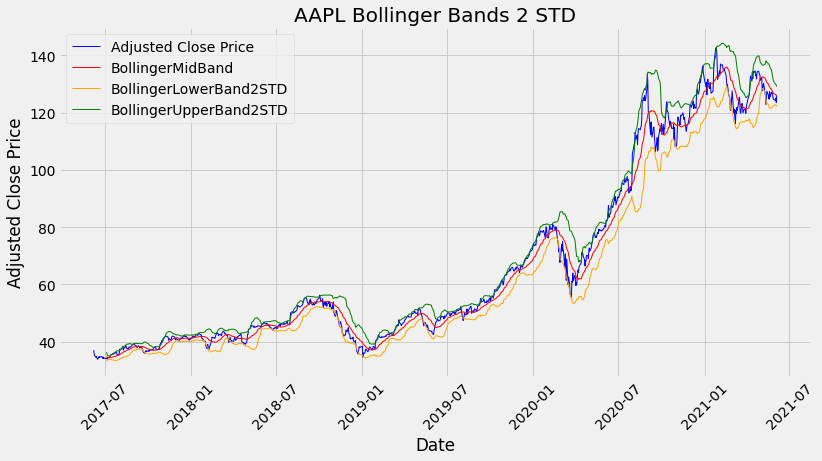

In [488]:
# Plot data
fig = plt.figure(figsize=(12,6))

# Add subplot
ax = fig.add_subplot(1,1,1)

# Set index
x_axis = aapl_df.index

# Add lines
ax.plot(x_axis, aapl_df['Adj Close'], color = 'blue', lw = 1, label = 'Adjusted Close Price')
ax.plot(x_axis, aapl_df['BollingerMidBand'], color = 'red', lw = 1, label = 'BollingerMidBand')
ax.plot(x_axis, aapl_df['BollingerLowerBand2STD'], color = 'orange', lw = 1, label = 'BollingerLowerBand2STD')
ax.plot(x_axis, aapl_df['BollingerUpperBand2STD'], color = 'green', lw = 1, label = 'BollingerUpperBand2STD')

# Set Labels
ax.set_title('AAPL Bollinger Bands 2 STD')
ax.set_xlabel('Date')
ax.set_ylabel('Adjusted Close Price')
plt.xticks(rotation = 45)
ax.legend()
plt.show()

In [489]:
# Create Buy/Sell Signals



buy_signal_2std = []
sell_signal_2std= []

for i in range(len(aapl_df['Adj Close'])):
        if aapl_df['Adj Close'][i] > aapl_df['BollingerUpperBand2STD'][i]: # SELL
            buy_signal_2std.append(np.nan)
            sell_signal_2std.append(aapl_df['Adj Close'][i])
        elif aapl_df['Adj Close'][i] < aapl_df['BollingerLowerBand2STD'][i]: # BUY
            buy_signal_2std.append(aapl_df['Adj Close'][i])
            sell_signal_2std.append(np.nan)
        else:
            buy_signal_2std.append(np.nan)
            sell_signal_2std.append(np.nan)
  


In [490]:
# Add to DF
aapl_df['Bollinger2STD-BUY'] = buy_signal_2std
aapl_df['Bollinger2STD-SELL'] = sell_signal_2std
aapl_df.tail(20)                                              

,Date,Open,High,Low,Close,Adj Close,Volume,Daily_Return,BollingerMidBand,BollingerSTD,BollingerUpperBand2STD,BollingerLowerBand2STD,Bollinger2STD-BUY,Bollinger2STD-SELL
2021-05-07,2021-05-07,130.850006,131.259995,129.479996,130.210007,130.210007,78892700,0.005327,132.293349,2.140471,136.574291,128.012408,NaN,NaN
2021-05-10,2021-05-10,129.410004,129.539993,126.809998,126.849998,126.849998,88071200,-0.025805,132.084977,2.451471,136.987918,127.182035,126.849998,NaN
2021-05-11,2021-05-11,123.500000,126.269997,122.769997,125.910004,125.910004,126142800,-0.007410,131.670375,2.756761,137.183897,126.156852,125.910004,NaN
2021-05-12,2021-05-12,123.400002,124.639999,122.250000,122.769997,122.769997,112172300,-0.024939,131.218568,3.398998,138.016565,124.420571,122.769997,NaN
2021-05-13,2021-05-13,124.580002,126.150002,124.260002,124.970001,124.970001,105861300,0.017920,130.753472,3.590235,137.933942,123.573003,NaN,NaN
2021-05-14,2021-05-14,126.250000,127.889999,125.849998,127.449997,127.449997,81806500,0.019845,130.429346,3.580734,137.590814,123.267879,NaN,NaN
2021-05-17,2021-05-17,126.820000,126.930000,125.169998,126.269997,126.269997,74244600,-0.009259,130.012279,3.553676,137.119631,122.904927,NaN,NaN
2021-05-18,2021-05-18,126.559998,126.989998,124.779999,124.849998,124.849998,63342900,-0.011246,129.610564,3.664315,136.939194,122.281935,NaN,NaN
2021-05-19,2021-05-19,123.160004,124.919998,122.860001,124.690002,124.690002,92612000,-0.001282,129.181383,3.715025,136.611434,121.751333,NaN,NaN
2021-05-20,2021-05-20,125.230003,127.720001,125.099998,127.309998,127.309998,76857100,0.021012,128.961069,3.687336,136.335741,121.586398,NaN,NaN


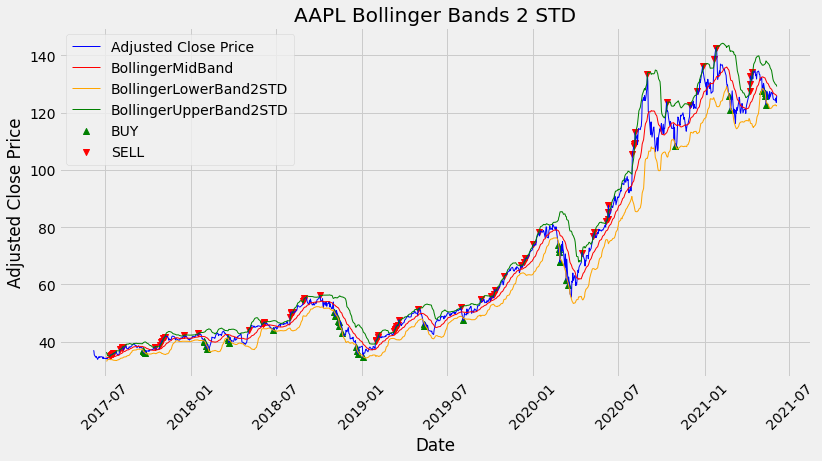

In [491]:
# Plot data
fig = plt.figure(figsize=(12,6))

# Add subplot
ax = fig.add_subplot(1,1,1)

# Set index
x_axis = aapl_df.index

# Add lines WITH Buy/Sell Signals
ax.plot(x_axis, aapl_df['Adj Close'], color = 'blue', lw = 1, label = 'Adjusted Close Price')
ax.plot(x_axis, aapl_df['BollingerMidBand'], color = 'red', lw = 1, label = 'BollingerMidBand')
ax.plot(x_axis, aapl_df['BollingerLowerBand2STD'], color = 'orange', lw = 1, label = 'BollingerLowerBand2STD')
ax.plot(x_axis, aapl_df['BollingerUpperBand2STD'], color = 'green', lw = 1, label = 'BollingerUpperBand2STD')
ax.scatter(x_axis, buy_signal_2std, color = 'green', lw = 1, label = 'BUY', marker = '^')
ax.scatter(x_axis, sell_signal_2std, color = 'red', lw = 1, label = 'SELL', marker = 'v')

# Set Labels
ax.set_title('AAPL Bollinger Bands 2 STD')
ax.set_xlabel('Date')
ax.set_ylabel('Adjusted Close Price')
plt.xticks(rotation = 45)
ax.legend()
plt.show()

In [492]:
# List values from 'Bollinger 2 STD-Buy' Column
aapl_df['Bollinger2STD-BUY'].head(20)

2017-06-07   NaN
2017-06-08   NaN
2017-06-09   NaN
2017-06-12   NaN
2017-06-13   NaN
2017-06-14   NaN
2017-06-15   NaN
2017-06-16   NaN
2017-06-19   NaN
2017-06-20   NaN
2017-06-21   NaN
2017-06-22   NaN
2017-06-23   NaN
2017-06-26   NaN
2017-06-27   NaN
2017-06-28   NaN
2017-06-29   NaN
2017-06-30   NaN
2017-07-03   NaN
2017-07-05   NaN
Name: Bollinger2STD-BUY, dtype: float64

In [493]:
# List values from 'Bollinger 2 STD-Sell' Column
aapl_df['Bollinger2STD-SELL'].head(20)

2017-06-07   NaN
2017-06-08   NaN
2017-06-09   NaN
2017-06-12   NaN
2017-06-13   NaN
2017-06-14   NaN
2017-06-15   NaN
2017-06-16   NaN
2017-06-19   NaN
2017-06-20   NaN
2017-06-21   NaN
2017-06-22   NaN
2017-06-23   NaN
2017-06-26   NaN
2017-06-27   NaN
2017-06-28   NaN
2017-06-29   NaN
2017-06-30   NaN
2017-07-03   NaN
2017-07-05   NaN
Name: Bollinger2STD-SELL, dtype: float64

In [494]:
# Buy at day after indicator is met. Remove all cells with 'nan'
Bollinger2STD_buys = [i+1 for i in buy_signal_2std]
Bollinger2STD_buys = [buy_signal_2std for buy_signal_2std in buy_signal_2std if str(buy_signal_2std) != 'nan']
Bollinger2STD_buys

[37.293449,
 36.653048999999996,
 36.294628,
 35.974426,
 40.278881,
 40.041470000000004,
 38.489887,
 37.528236,
 41.240124,
 40.65741,
 39.715919,
 44.033878,
 50.327675,
 48.898945,
 49.427746,
 47.263443,
 46.791222,
 45.469494,
 43.079178000000006,
 38.174412,
 36.689594,
 35.74028,
 34.610851000000004,
 45.575328999999996,
 46.296795,
 47.445263,
 73.846161,
 71.344841,
 72.47663100000001,
 67.738968,
 67.699341,
 61.475739000000004,
 59.984843999999995,
 108.32636299999999,
 125.786346,
 120.78483600000001,
 127.633202,
 127.88278999999999,
 126.849998,
 125.910004,
 122.769997]

In [495]:
# Sell at day after indicator is met. Remove all cells with 'nan'
Bollinger2STD_sells = [i+1 for i in sell_signal_2std]
Bollinger2STD_sells = [sell_signal_2std for sell_signal_2std in sell_signal_2std if str(sell_signal_2std) != 'nan']
Bollinger2STD_sells

[35.17202,
 35.4743,
 35.598071999999995,
 35.721855,
 35.945583,
 37.402245,
 37.799746999999996,
 38.102028000000004,
 38.335281,
 38.203869,
 38.344840999999995,
 38.961342,
 39.838306,
 40.392677,
 41.219452000000004,
 41.637623,
 42.307701,
 42.950396999999995,
 44.264439,
 46.368881,
 46.726624,
 46.888577000000005,
 48.706295000000004,
 50.130024,
 50.275055,
 50.536114000000005,
 54.087444,
 54.584709,
 55.215378,
 56.292374,
 40.223942,
 40.513611,
 40.533089000000004,
 41.684422,
 42.397625,
 43.733299,
 44.224655,
 44.420219,
 44.914021000000005,
 45.498264,
 45.962746,
 47.691051,
 51.463013000000004,
 52.279598,
 55.07701899999999,
 54.95385,
 55.919472,
 56.678173,
 58.185715,
 58.101952000000004,
 63.01625799999999,
 66.884315,
 67.9813,
 69.144997,
 69.280899,
 74.207466,
 78.311295,
 71.089745,
 77.01358,
 78.22541,
 82.320328,
 82.807037,
 85.421921,
 87.619614,
 105.548805,
 108.208389,
 108.93101499999999,
 109.325851,
 113.140152,
 133.522247,
 123.79019199999999,


In [496]:
# Indicate exact price points
Bollinger2STD_buy_price = aapl_df.iloc[Bollinger2STD_buys]
Bollinger2STD_sell_price = aapl_df.iloc[Bollinger2STD_sells]

In [497]:
# Incase of the first indicator being a sell and the last being a buy, drop these values
if Bollinger2STD_sells[0] < Bollinger2STD_buys[0]:
  Bollinger2STD_sell_price = Bollinger2STD_sell_price.drop(Bollinger2STD_sell_price.index[0])
elif Bollinger3STD_buys[-1] > Bollinger3STD_sells[-1]:
  Bollinger2STD_buy_price = Bollinger2STD_buy_price.drop(Bollinger2STD_buy_price.index[-1])

In [498]:
# Calculate profit

Bollinger2STD_Profit=[]

for i in range(len(Bollinger2STD_buys)):
  Bollinger2STD_Profit.append((Bollinger2STD_sells[i] - Bollinger2STD_buys[i])/Bollinger2STD_buys[i])


In [499]:
Bollinger2STD_Profit

[-0.056884762790376374,
 -0.032159643799346584,
 -0.01919171068511869,
 -0.007020848643978453,
 -0.1075823829366064,
 -0.06591229043289377,
 -0.01793042416570375,
 0.015289607537108979,
 -0.0704373003340145,
 -0.060346711706426984,
 -0.03452212700907171,
 -0.11519621324290355,
 -0.20842148976681313,
 -0.17395606387826976,
 -0.16606652466005623,
 -0.11903110824998518,
 -0.0958197031058517,
 -0.0554019140833193,
 0.027513547264063323,
 0.2146586828894707,
 0.2735661234081795,
 0.3119252843010745,
 0.40725505420251007,
 0.09993773166179454,
 0.08592949036752973,
 0.06514561843613362,
 -0.26756593345455015,
 -0.23491722407791202,
 -0.23816301560705833,
 -0.1689809328066527,
 -0.4058444084411398,
 -0.34098212304532044,
 -0.3242778292463342,
 -0.615195961116132,
 -0.6629393702238556,
 -0.6379239278016654,
 -0.6535019547656573,
 -0.6526489686376095,
 -0.6459280905940573,
 -0.6386445671147783,
 -0.625619067173228]

In [500]:
# Print profit statement
Bollinger2STD_avg_profit = sum(Bollinger2STD_Profit)/len(Bollinger2STD_Profit)
print(f"Bollinger 2 STD Avg Profit Rate of {(Bollinger2STD_avg_profit)*100} %")

Bollinger 2 STD Avg Profit Rate of -17.116569398850785 %


In [502]:
# Bollinger Bands 3 Standard Deviations

# Set bollinger band window

bollinger_window = 20

# Calculate rolling mean and standard deviation
aapl_df['BollingerMidBand'] = aapl_df['Adj Close'].rolling(window=bollinger_window).mean()
aapl_df['BollingerSTD'] = aapl_df['Adj Close'].rolling(window=20).std()

# Calculate upper and lowers bands of bollinger band
aapl_df['BollingerUpperBand3STD']  = aapl_df['BollingerMidBand'] + (aapl_df['BollingerSTD'] * 3)
aapl_df['BollingerLowerBand3STD']  = aapl_df['BollingerMidBand'] - (aapl_df['BollingerSTD'] * 3)

aapl_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Daily_Return,BollingerMidBand,BollingerSTD,BollingerUpperBand2STD,BollingerLowerBand2STD,Bollinger2STD-BUY,Bollinger2STD-SELL,BollingerUpperBand3STD,BollingerLowerBand3STD
2017-06-07,2017-06-07,38.755001,38.994999,38.619999,38.842499,36.980961,84278400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-06-08,2017-06-08,38.812500,38.884998,38.599998,38.747501,36.890507,85003200,-0.002446,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-06-09,2017-06-09,38.797501,38.797501,36.505001,37.244999,35.460018,259530800,-0.038777,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-06-12,2017-06-12,36.435001,36.522499,35.627499,36.355000,34.612671,289229200,-0.023896,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-06-13,2017-06-13,36.790001,36.862499,36.287498,36.647499,34.891159,136661600,0.008046,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


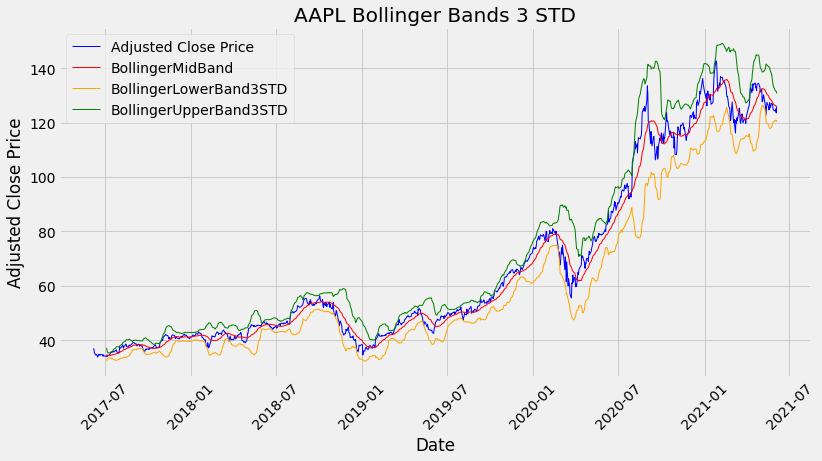

In [503]:
# Plot data
fig = plt.figure(figsize=(12,6))

# Add subplot
ax = fig.add_subplot(1,1,1)

# Set index
x_axis = aapl_df.index

# Add lines
ax.plot(x_axis, aapl_df['Adj Close'], color = 'blue', lw = 1, label = 'Adjusted Close Price')
ax.plot(x_axis, aapl_df['BollingerMidBand'], color = 'red', lw = 1, label = 'BollingerMidBand')
ax.plot(x_axis, aapl_df['BollingerLowerBand3STD'], color = 'orange', lw = 1, label = 'BollingerLowerBand3STD')
ax.plot(x_axis, aapl_df['BollingerUpperBand3STD'], color = 'green', lw = 1, label = 'BollingerUpperBand3STD')

# Set Labels
ax.set_title('AAPL Bollinger Bands 3 STD')
ax.set_xlabel('Date')
ax.set_ylabel('Adjusted Close Price')
plt.xticks(rotation = 45)
ax.legend()
plt.show()

In [504]:
# Create Buy/Sell Signals


buy_signal_3std = []
sell_signal_3std= []

for i in range(len(aapl_df['Adj Close'])):
        if aapl_df['Adj Close'][i] > aapl_df['BollingerUpperBand3STD'][i]: # SELL
            buy_signal_3std.append(np.nan)
            sell_signal_3std.append(aapl_df['Adj Close'][i])
        elif aapl_df['Adj Close'][i] < aapl_df['BollingerLowerBand3STD'][i]: # BUY
            buy_signal_3std.append(aapl_df['Adj Close'][i])
            sell_signal_3std.append(np.nan)
        else:
            buy_signal_3std.append(np.nan)
            sell_signal_3std.append(np.nan)


In [505]:
# Add to DF
aapl_df['Bollinger3STD-BUY'] = buy_signal_3std
aapl_df['Bollinger3STD-SELL'] = sell_signal_3std
aapl_df.tail() 

,Date,Open,High,Low,Close,Adj Close,Volume,Daily_Return,BollingerMidBand,BollingerSTD,BollingerUpperBand2STD,BollingerLowerBand2STD,Bollinger2STD-BUY,Bollinger2STD-SELL,BollingerUpperBand3STD,BollingerLowerBand3STD,Bollinger3STD-BUY,Bollinger3STD-SELL
2021-05-28,2021-05-28,125.570000,125.800003,124.550003,124.610001,124.610001,71311100,-0.005348,126.740062,2.175555,131.091172,122.388952,NaN,NaN,133.266726,120.213398,NaN,NaN
2021-06-01,2021-06-01,125.080002,125.349998,123.940002,124.279999,124.279999,67637100,-0.002648,126.338300,1.801588,129.941476,122.735123,NaN,NaN,131.743065,120.933534,NaN,NaN
2021-06-02,2021-06-02,124.279999,125.239998,124.050003,125.059998,125.059998,59278900,0.006276,126.209639,1.796120,129.801880,122.617399,NaN,NaN,131.598000,120.821279,NaN,NaN
2021-06-03,2021-06-03,124.680000,124.849998,123.129997,123.540001,123.540001,76229200,-0.012154,125.992500,1.845043,129.682585,122.302415,NaN,NaN,131.527627,120.457372,NaN,NaN
2021-06-04,2021-06-04,124.070000,126.160004,123.849998,125.889999,125.889999,75087300,0.019022,125.811000,1.647771,129.106542,122.515458,NaN,NaN,130.754312,120.867687,NaN,NaN


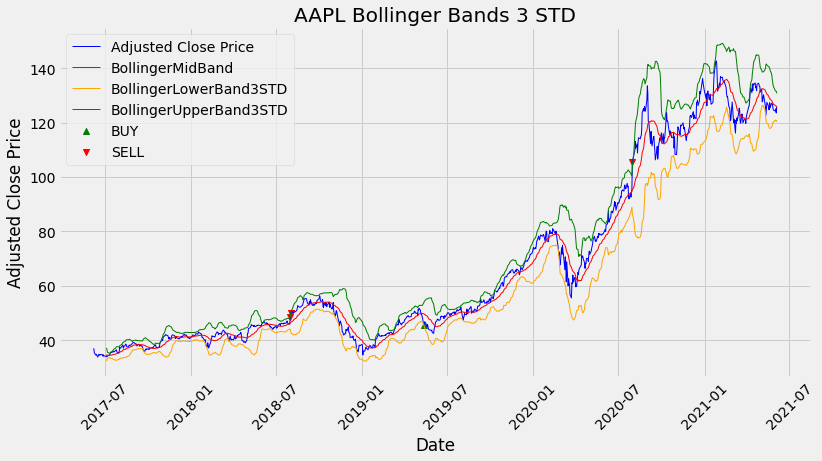

In [506]:
# Plot data
fig = plt.figure(figsize=(12,6))

# Add subplot
ax = fig.add_subplot(1,1,1)

# Set index
x_axis = aapl_df.index

# Add lines WITH Buy/Sell Signals
ax.plot(x_axis, aapl_df['Adj Close'], color = 'blue', lw = 1, label = 'Adjusted Close Price')
ax.plot(x_axis, aapl_df['BollingerMidBand'], color = 'red', lw = 1, label = 'BollingerMidBand')
ax.plot(x_axis, aapl_df['BollingerLowerBand3STD'], color = 'orange', lw = 1, label = 'BollingerLowerBand3STD')
ax.plot(x_axis, aapl_df['BollingerUpperBand3STD'], color = 'green', lw = 1, label = 'BollingerUpperBand3STD')
ax.scatter(x_axis, buy_signal_3std, color = 'green', lw = 1, label = 'BUY', marker = '^')
ax.scatter(x_axis, sell_signal_3std, color = 'red', lw = 1, label = 'SELL', marker = 'v')

# Set Labels
ax.set_title('AAPL Bollinger Bands 3 STD')
ax.set_xlabel('Date')
ax.set_ylabel('Adjusted Close Price')
plt.xticks(rotation = 45)
ax.legend()
plt.show()

In [507]:
# List 'Bollinger3STD-Buy' Values
aapl_df['Bollinger3STD-BUY'].head(50)

2017-06-07   NaN
2017-06-08   NaN
2017-06-09   NaN
2017-06-12   NaN
2017-06-13   NaN
2017-06-14   NaN
2017-06-15   NaN
2017-06-16   NaN
2017-06-19   NaN
2017-06-20   NaN
2017-06-21   NaN
2017-06-22   NaN
2017-06-23   NaN
2017-06-26   NaN
2017-06-27   NaN
2017-06-28   NaN
2017-06-29   NaN
2017-06-30   NaN
2017-07-03   NaN
2017-07-05   NaN
2017-07-06   NaN
2017-07-07   NaN
2017-07-10   NaN
2017-07-11   NaN
2017-07-12   NaN
2017-07-13   NaN
2017-07-14   NaN
2017-07-17   NaN
2017-07-18   NaN
2017-07-19   NaN
2017-07-20   NaN
2017-07-21   NaN
2017-07-24   NaN
2017-07-25   NaN
2017-07-26   NaN
2017-07-27   NaN
2017-07-28   NaN
2017-07-31   NaN
2017-08-01   NaN
2017-08-02   NaN
2017-08-03   NaN
2017-08-04   NaN
2017-08-07   NaN
2017-08-08   NaN
2017-08-09   NaN
2017-08-10   NaN
2017-08-11   NaN
2017-08-14   NaN
2017-08-15   NaN
2017-08-16   NaN
Name: Bollinger3STD-BUY, dtype: float64

In [508]:
# List 'Bollinger3STD-Sell' Values
aapl_df['Bollinger3STD-SELL'].head(20)

2017-06-07   NaN
2017-06-08   NaN
2017-06-09   NaN
2017-06-12   NaN
2017-06-13   NaN
2017-06-14   NaN
2017-06-15   NaN
2017-06-16   NaN
2017-06-19   NaN
2017-06-20   NaN
2017-06-21   NaN
2017-06-22   NaN
2017-06-23   NaN
2017-06-26   NaN
2017-06-27   NaN
2017-06-28   NaN
2017-06-29   NaN
2017-06-30   NaN
2017-07-03   NaN
2017-07-05   NaN
Name: Bollinger3STD-SELL, dtype: float64

In [521]:
# Buy at day after indicator is met. Remove all cells with 'nan'
Bollinger3STD_buys = [i+1 for i in buy_signal_3std]
Bollinger3STD_buys = [buy_signal_3std for buy_signal_3std in buy_signal_3std if str(buy_signal_3std) != 'nan']
Bollinger3STD_buys

[45.575328999999996]

In [520]:
# Sell at day after indicator is met. Remove all cells with 'nan'
Bollinger3STD_sells = [i+1 for i in sell_signal_3std]
Bollinger3STD_sells = [sell_signal_3std for sell_signal_3std in sell_signal_3std if str(sell_signal_3std) != 'nan']
Bollinger3STD_sells

[48.706295000000004, 50.130024, 105.548805]

In [522]:
# Indicate exact price point
Bollinger3STD_buy_price = aapl_df.iloc[Bollinger3STD_buys]
Bollinger3STD_sell_price = aapl_df.iloc[Bollinger3STD_sells]

In [523]:
# Incase of the first indicator being a sell and the last being a buy, drop these values
if Bollinger3STD_sells[0] < Bollinger3STD_buys[0]:
  Bollinger3STD_sell_price = Bollinger3STD_sell_price.drop(Bollinger3STD_sell_price.index[0])
elif Bollinger3STD_buys[-1] > Bollinger3STD_sells[-1]:
  Bollinger3STD_buy_price = Bollinger3STD_buy_price.drop(Bollinger3STD_buy_price.index[-1])

In [524]:
# Find profit
Bollinger3STD_Profit=[]

for i in range(len(Bollinger3STD_buys)):
  Bollinger3STD_Profit.append((Bollinger3STD_sells[i] - Bollinger3STD_buys[i])/Bollinger3STD_buys[i])


In [525]:
Bollinger3STD_Profit

[0.06869870319531886]

In [526]:
# Print profit statement 
Bollinger3STD_avg_profit = sum(Bollinger3STD_Profit)/len(Bollinger3STD_Profit)
print(f"Bollinger 3 STD Avg Profit Rate of {(Bollinger3STD_avg_profit)*100} %")

Bollinger 3 STD Avg Profit Rate of 6.869870319531886 %


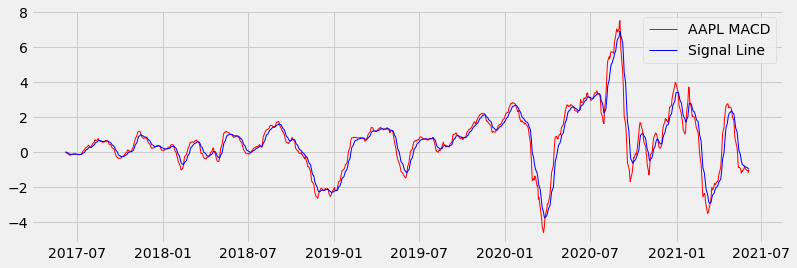

In [527]:
# MACD and Signal Line

# Short Term EMA
ST_EMA = aapl_df['Adj Close'].ewm(span=12).mean()

# Long Term EMA
LT_EMA = aapl_df['Adj Close'].ewm(span=26).mean()

# MACD Line
MACD = ST_EMA - LT_EMA

#Signal Line
Signal = MACD.ewm(span=9).mean()

# Plot MACD and Signal Line
plt.figure(figsize=(12,4))
plt.plot(aapl_df.index, MACD, label = 'AAPL MACD', color = 'red', lw = 1)
plt.plot(aapl_df.index, Signal, label = 'Signal Line', color = 'blue', lw = 1)
plt.legend()
plt.show()


In [528]:
# Add to df
aapl_df['MACD'] = MACD
aapl_df['Signal_Line'] = Signal
aapl_df.head()


,Date,Open,High,Low,Close,Adj Close,Volume,Daily_Return,BollingerMidBand,BollingerSTD,BollingerUpperBand2STD,BollingerLowerBand2STD,Bollinger2STD-BUY,Bollinger2STD-SELL,BollingerUpperBand3STD,BollingerLowerBand3STD,Bollinger3STD-BUY,Bollinger3STD-SELL,MACD,Signal_Line
2017-06-07,2017-06-07,38.755001,38.994999,38.619999,38.842499,36.980961,84278400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000
2017-06-08,2017-06-08,38.812500,38.884998,38.599998,38.747501,36.890507,85003200,-0.002446,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.002029,-0.001127
2017-06-09,2017-06-09,38.797501,38.797501,36.505001,37.244999,35.460018,259530800,-0.038777,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.046945,-0.019905
2017-06-12,2017-06-12,36.435001,36.522499,35.627499,36.355000,34.612671,289229200,-0.023896,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.096816,-0.045959
2017-06-13,2017-06-13,36.790001,36.862499,36.287498,36.647499,34.891159,136661600,0.008046,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.110796,-0.065247


In [529]:
# Buy/Sell indicators

MACD_Buy, MACD_Sell = [],[]
flag = -1

for i in range(len(aapl_df['Adj Close'])):
    if aapl_df['MACD'][i] > aapl_df['Signal_Line'][i]: # SELL
       MACD_Sell.append(np.nan)
       if flag != 1:
          MACD_Buy.append(aapl_df["Adj Close"][i])
          flag = 1
       else:
          MACD_Buy.append(np.nan)
    elif aapl_df['MACD'][i] < aapl_df['Signal_Line'][i]: # BUY
        MACD_Buy.append(np.nan)
        if flag != 0:
          MACD_Sell.append(aapl_df['Adj Close'][i])
          flag = 0
        else: 
          MACD_Sell.append(np.nan)
    else:
            MACD_Buy.append(np.nan)
            MACD_Sell.append(np.nan)


In [530]:
# Append indicators to df

aapl_df['MACD-Buy'] = MACD_Buy
aapl_df['MACD-Sell'] = MACD_Sell

In [531]:
aapl_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Daily_Return,BollingerMidBand,BollingerSTD,BollingerUpperBand2STD,BollingerLowerBand2STD,Bollinger2STD-BUY,Bollinger2STD-SELL,BollingerUpperBand3STD,BollingerLowerBand3STD,Bollinger3STD-BUY,Bollinger3STD-SELL,MACD,Signal_Line,MACD-Buy,MACD-Sell
2017-06-07,2017-06-07,38.755001,38.994999,38.619999,38.842499,36.980961,84278400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN
2017-06-08,2017-06-08,38.812500,38.884998,38.599998,38.747501,36.890507,85003200,-0.002446,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.002029,-0.001127,NaN,36.890507
2017-06-09,2017-06-09,38.797501,38.797501,36.505001,37.244999,35.460018,259530800,-0.038777,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.046945,-0.019905,NaN,NaN
2017-06-12,2017-06-12,36.435001,36.522499,35.627499,36.355000,34.612671,289229200,-0.023896,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.096816,-0.045959,NaN,NaN
2017-06-13,2017-06-13,36.790001,36.862499,36.287498,36.647499,34.891159,136661600,0.008046,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.110796,-0.065247,NaN,NaN


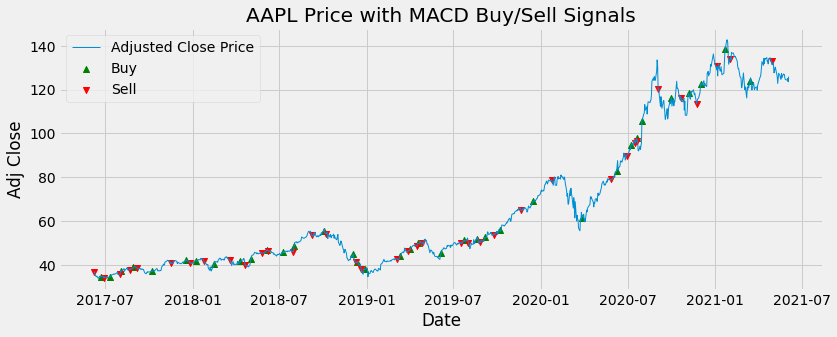

In [532]:
# Plot Chart
plt.figure(figsize=(12.2, 4.5))
plt.scatter(aapl_df.index, aapl_df['MACD-Buy'], color='green', label='Buy', marker='^', lw = 1)
plt.scatter(aapl_df.index, aapl_df['MACD-Sell'], color='red', label='Sell', marker='v', lw = 1)
plt.plot(aapl_df['Adj Close'], label='Adjusted Close Price', lw = 1)
plt.title('AAPL Price with MACD Buy/Sell Signals')
plt.xlabel('Date')
plt.ylabel('Adj Close')
plt.legend(loc = 'upper left')
plt.show()

In [533]:
# List values in 'MACD-Buy'
aapl_df['MACD-Buy'].head(20)

2017-06-07          NaN
2017-06-08          NaN
2017-06-09          NaN
2017-06-12          NaN
2017-06-13          NaN
2017-06-14          NaN
2017-06-15          NaN
2017-06-16          NaN
2017-06-19          NaN
2017-06-20          NaN
2017-06-21          NaN
2017-06-22    34.662663
2017-06-23          NaN
2017-06-26          NaN
2017-06-27          NaN
2017-06-28          NaN
2017-06-29          NaN
2017-06-30          NaN
2017-07-03          NaN
2017-07-05          NaN
Name: MACD-Buy, dtype: float64

In [534]:
# List values in 'MACD-Sell'
aapl_df['MACD-Sell'].head(20)

2017-06-07          NaN
2017-06-08    36.890507
2017-06-09          NaN
2017-06-12          NaN
2017-06-13          NaN
2017-06-14          NaN
2017-06-15          NaN
2017-06-16          NaN
2017-06-19          NaN
2017-06-20          NaN
2017-06-21          NaN
2017-06-22          NaN
2017-06-23          NaN
2017-06-26          NaN
2017-06-27          NaN
2017-06-28          NaN
2017-06-29    34.198517
2017-06-30          NaN
2017-07-03          NaN
2017-07-05          NaN
Name: MACD-Sell, dtype: float64

In [535]:
# # Buy at day after indicator is met. Remove all cells with 'nan'
MACD_buys = [i+1 for i in MACD_Buy]
MACD_buys = [MACD_Buy for MACD_Buy in MACD_Buy if str(MACD_Buy) != 'nan']
MACD_buys

[34.662663,
 34.526984999999996,
 37.402245,
 38.927890999999995,
 37.109446999999996,
 42.307701,
 41.811283,
 40.301041,
 41.716892,
 42.516315000000006,
 46.888577000000005,
 46.06673,
 48.706295000000004,
 55.615607999999995,
 44.987534000000004,
 41.161091,
 38.02837,
 44.224655,
 47.429478,
 49.834938,
 45.452625,
 51.248924,
 51.815609,
 52.537354,
 55.931789,
 69.144997,
 61.354385,
 82.807037,
 94.704369,
 97.699188,
 105.548805,
 116.217491,
 118.31195100000001,
 122.329109,
 138.627029,
 123.779747]

In [536]:
# Sell at day after indicator is met. Remove all cells with 'nan'
MACD_sells = [i+1 for i in MACD_Sell]
MACD_sells = [MACD_Sell for MACD_Sell in MACD_Sell if str(MACD_Sell) != 'nan']
MACD_sells

[36.890507,
 34.198516999999995,
 35.714703,
 37.565865,
 38.688931,
 41.031895,
 40.904796999999995,
 41.780109,
 42.210503,
 39.903744,
 45.583298,
 46.337463,
 45.904778,
 53.679935,
 54.279079,
 41.282795,
 38.174412,
 42.662579,
 46.133858000000004,
 48.703094,
 49.942493,
 49.901699,
 50.066113,
 50.290817,
 53.621204000000006,
 65.026344,
 78.644852,
 78.995224,
 89.839653,
 95.682777,
 96.35078399999999,
 120.28743700000001,
 116.297104,
 113.487358,
 130.592697,
 133.712723,
 133.25366200000002]

In [537]:
# Indicate exact price point
MACD_buy_price = aapl_df.iloc[MACD_buys]
MACD_sell_price = aapl_df.iloc[MACD_sells]

In [538]:
# Incase of the first indicator being a sell and the last being a buy, drop these values
if MACD_sell_price.index[0] < MACD_buy_price.index[0]:
  MACD_sell_price = MACD_sell_price.drop(MACD_sell_price.index[0])
elif MACD_buy_price.index[-1] > MACD_sell_price.index[-1]:
  MACD_buy_price = MACD_buy_price.drop(MACD_buy_price.index[-1])

In [539]:
# Find profit
profit=[]

for i in range(len(MACD_buys)):
  profit.append((MACD_sells[i] - MACD_buys[i])/MACD_buys[i])



In [540]:
profit

[0.06427215358496828,
 -0.009513370483985234,
 -0.04511873551975291,
 -0.03498843541254247,
 0.04256285468225923,
 -0.030155408349888897,
 -0.021680415786332317,
 0.036700491185823345,
 0.011832401129019902,
 -0.06144866976359551,
 -0.02783788895960749,
 0.005876974554087079,
 -0.05751858153037515,
 -0.03480449229288286,
 0.20653599283748245,
 0.0029567729387931225,
 0.0038403434067774724,
 -0.035321383513336566,
 -0.027316767011435365,
 -0.022711857291765888,
 0.09878126950863678,
 -0.02628786899018605,
 -0.03376387991502716,
 -0.04276075647052959,
 -0.041310765153605156,
 -0.059565452002261404,
 0.2818130603053066,
 -0.04603247668431852,
 -0.05136738728495199,
 -0.02063897399024447,
 -0.0871447194499266,
 0.035020081443678866,
 -0.01702995329694126,
 -0.07227838960226549,
 -0.05795646100155552,
 0.0802471829256527]

In [541]:
# Print profit statement
MACD_avg_profit = sum(profit)/len(profit)
print(f"MACD Avg Profit Rate of {(MACD_avg_profit)*100} %")

MACD Avg Profit Rate of -0.26142642015230005 %


In [542]:

# Save new df
aapl_df.to_csv(r'C:\Users\mknitchov\Desktop\TradingSignals_Final.csv', index=False, header=True)